**Class Project:**  - Jenifer Ramos Rios - Code: 22500237

Data base connection

In [4]:
# Librerias
import yaml
import psycopg2 
from psycopg2 import sql
from sqlalchemy import create_engine, text
from sqlalchemy.types import Integer, String, DateTime, Float
import pandas as pd
import os
import re

In [5]:
def load_config(file_path="config.yaml"):
    with open(file_path, "r") as file: # Abre el archivo en modo lectura ("r")
        return yaml.safe_load(file) # Carga y devuelve el contenido del archivo YAML

In [6]:
config = load_config()
db_config = config["database"]

# Load credentials, se accede a los valores de la clave "database" del archivo config.yaml
db_user = db_config["user"]
db_password = db_config["password"]
db_host = db_config["host"]
db_port = db_config["port"]
db_name = db_config["name"]

# DB connection
conn = psycopg2.connect(
    dbname="postgres",
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port
)
conn.autocommit = True

In [ ]:
#Creating the database 
db_name = "ETL_Project"
try:
    with conn.cursor() as cur:
        cur.execute(sql.SQL("CREATE DATABASE {}").format(sql.Identifier(db_name)))
        print(f"Base de datos '{db_name}' creada exitosamente.")
except psycopg2.errors.DuplicateDatabase:
    print(f"La base de datos '{db_name}' ya existe.")
finally:
    conn.close() #Close the database connection

File Reading for Review and Table Creation

In [7]:
# Specify the directory where the files are located
first_course_path = "D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso"


#List to store file names
first_course_file_list = []

# Iterate over the files in the directory
for filename in os.listdir(first_course_path):
    # Check if the file has the .xlsx extension
    if filename.endswith(".xlsx"):
        # Add the file to the list
        first_course_file_list.append(os.path.join(first_course_path, filename))

# Print the list of files
print("Excel (xlsx) files found:", first_course_file_list)

Excel (xlsx) files found: ['D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\\2017_1ERCURSO.xlsx', 'D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\\2018_1ERCURSO.xlsx', 'D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\\2019_1ERCURSO.xlsx', 'D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\\2020_1ERCURSO.xlsx', 'D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\\2021_1ERCURSO.xlsx', 'D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\\2022_1ERCURSO.xlsx', 'D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\\2023_1ERCURSO.xlsx']


In [8]:
table_names = []

# Crear una conexión a la base de datos ETL_Project
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Leer los archivos en dataframes y cargarlos en la base de datos
for file in first_course_file_list:
    # Leer el archivo en un dataframe
    df = pd.read_excel(file, header=None)
    
    # Hacer que la primera fila sea el encabezado
    df.columns = df.iloc[0]
    df = df[1:]

    # Cambiar los encabezados a mayúsculas y eliminar tildes
    df.columns = df.columns.str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

    # Obtener el nombre del archivo sin la extensión
    table_name = "tabla_" + os.path.splitext(os.path.basename(file))[0]
    table_names.append(table_name)

    # Cargar el dataframe en la base de datos
    df.to_sql(table_name, engine, if_exists='replace', index=False)
    print(f"Datos del archivo {file} cargados en la tabla '{table_name}' de la base de datos.")

Datos del archivo D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\2017_1ERCURSO.xlsx cargados en la tabla 'tabla_2017_1ERCURSO' de la base de datos.
Datos del archivo D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\2018_1ERCURSO.xlsx cargados en la tabla 'tabla_2018_1ERCURSO' de la base de datos.
Datos del archivo D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\2019_1ERCURSO.xlsx cargados en la tabla 'tabla_2019_1ERCURSO' de la base de datos.
Datos del archivo D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\2020_1ERCURSO.xlsx cargados en la tabla 'tabla_2020_1ERCURSO' de la base de datos.
Datos del archivo D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\2021_1ERCURSO.xlsx cargados en la tabla 'tabla_2021_1ERCURSO' de la base de datos.
Datos del archivo D:/JENN/Maestria IACD/ETL/ETL-Class-Project/Data/1erCurso\2022_1ERCURSO.xlsx cargados en la tabla 'tabla_2022_1ERCURSO' de la base de datos.
Datos del archivo D:/JENN/Maestria IACD/ETL/ET

#### Load of data from database to transform

In [9]:
# leer las tablas de la DB en dataframes y mostrar los encabezados de cada tabla
# Load the tables in daba base and do a copy into a DataFrame
with engine.connect() as conn:
	df_2017_1ERCURSO_copy= pd.read_sql('SELECT * FROM "tabla_2017_1ERCURSO"', conn)
	df_2018_1ERCURSO_copy= pd.read_sql('SELECT * FROM "tabla_2018_1ERCURSO"', conn)
	df_2019_1ERCURSO_copy= pd.read_sql('SELECT * FROM "tabla_2019_1ERCURSO"', conn)
	df_2020_1ERCURSO_copy= pd.read_sql('SELECT * FROM "tabla_2020_1ERCURSO"', conn)
	df_2021_1ERCURSO_copy= pd.read_sql('SELECT * FROM "tabla_2021_1ERCURSO"', conn)
	df_2022_1ERCURSO_copy= pd.read_sql('SELECT * FROM "tabla_2022_1ERCURSO"', conn)
	df_2023_1ERCURSO_copy= pd.read_sql('SELECT * FROM "tabla_2023_1ERCURSO"', conn)

In [ ]:

# Display the first few rows of the DataFrame
df_2017_1ERCURSO_copy.head()


In [ ]:
df_2018_1ERCURSO_copy.head()


In [ ]:
df_2019_1ERCURSO_copy.head()


In [ ]:
df_2020_1ERCURSO_copy.head()


In [ ]:
df_2021_1ERCURSO_copy.head()


In [ ]:
df_2022_1ERCURSO_copy.head()


In [ ]:
df_2023_1ERCURSO_copy.head()

In [10]:
# Mostrar los encabezados de los DataFrames en orden alfabético
for i, df in enumerate([df_2017_1ERCURSO_copy, df_2018_1ERCURSO_copy, df_2019_1ERCURSO_copy, 
                         df_2020_1ERCURSO_copy, df_2021_1ERCURSO_copy, df_2022_1ERCURSO_copy, 
                         df_2023_1ERCURSO_copy]):
    print(f"Encabezados del DataFrame {i + 2017} (ordenados alfabéticamente):")
    print(sorted(df.columns.tolist()))
    print()

Encabezados del DataFrame 2017 (ordenados alfabéticamente):
['ANO', 'AREA DE CONOCIMIENTO', 'CARACTER IES', 'CODIGO \nSNIES DEL\nPROGRAMA', 'CODIGO DE \nLA INSTITUCION', 'CODIGO DEL \nDEPARTAMENTO\n(IES)', 'CODIGO DEL \nDEPARTAMENTO\n(PROGRAMA)', 'CODIGO DEL \nMUNICIPIO\n(IES)', 'CODIGO DEL \nMUNICIPIO\n(PROGRAMA)', 'DEPARTAMENTO DE \nDOMICILIO DE LA IES', 'DEPARTAMENTO DE OFERTA DEL PROGRAMA', 'ID AREA', 'ID CARACTER', 'ID METODOLOGIA', 'ID NIVEL ACADEMICO', 'ID NIVEL DE FORMACION', 'ID SECTOR IES', 'ID SEXO', 'ID_NUCLEO', 'IES PADRE', 'INSTITUCION DE EDUCACION SUPERIOR (IES)', 'METODOLOGIA', 'MUNICIPIO DE\nDOMICILIO DE LA IES', 'MUNICIPIO DE OFERTA DEL PROGRAMA', 'NIVEL ACADEMICO', 'NIVEL DE FORMACION', 'NUCLEO BASICO DEL CONOCIMIENTO (NBC)', 'PRIMER CURSO 2017', 'PRINCIPAL\n O\nSECCIONAL', 'PROGRAMA ACADEMICO', 'SECTOR IES', 'SEMESTRE', 'SEXO']

Encabezados del DataFrame 2018 (ordenados alfabéticamente):
['ANO', 'AREA DE CONOCIMIENTO', 'CARACTER IES', 'CODIGO DE LA INSTITUCION', 'CO

In [11]:
# Mostrar los tipos de datos de cada DataFrame
for i, df in enumerate([df_2017_1ERCURSO_copy, df_2018_1ERCURSO_copy, df_2019_1ERCURSO_copy, 
                         df_2020_1ERCURSO_copy, df_2021_1ERCURSO_copy, df_2022_1ERCURSO_copy, 
                         df_2023_1ERCURSO_copy]):
    print(f"Tipos de datos del DataFrame {i + 2017}:")
    print(df.dtypes)
    print()

Tipos de datos del DataFrame 2017:
CODIGO DE \nLA INSTITUCION                  int64
IES PADRE                                   int64
INSTITUCION DE EDUCACION SUPERIOR (IES)    object
PRINCIPAL\n O\nSECCIONAL                   object
ID SECTOR IES                               int64
SECTOR IES                                 object
ID CARACTER                                 int64
CARACTER IES                               object
CODIGO DEL \nDEPARTAMENTO\n(IES)            int64
DEPARTAMENTO DE \nDOMICILIO DE LA IES      object
CODIGO DEL \nMUNICIPIO\n(IES)               int64
MUNICIPIO DE\nDOMICILIO DE LA IES          object
CODIGO \nSNIES DEL\nPROGRAMA                int64
PROGRAMA ACADEMICO                         object
ID NIVEL ACADEMICO                          int64
NIVEL ACADEMICO                            object
ID NIVEL DE FORMACION                       int64
NIVEL DE FORMACION                         object
ID METODOLOGIA                              int64
METODOLOGIA    

In [12]:
# Palabras clave para filtrar las columnas
keywords = ['SNIES', 'SEXO', 'AÑO', 'ANO', 'PRIMER','CURSO', 'SEMESTRE']

# Crear una lista de DataFrames
dataframes = [df_2017_1ERCURSO_copy, df_2018_1ERCURSO_copy, df_2019_1ERCURSO_copy, 
              df_2020_1ERCURSO_copy, df_2021_1ERCURSO_copy, df_2022_1ERCURSO_copy, 
              df_2023_1ERCURSO_copy]

# Iterar sobre cada DataFrame y realizar las transformaciones necesarias
filtered_dataframes = []
for i, df in enumerate(dataframes):
    
    # Añadir la descripción de sexo
    df['SEXO'] = df['ID SEXO'].apply(lambda x: 'Masculino' if x == 1 else 'Femenino' if x == 2 else 'Desconocido')
    
    # Filtrar las columnas que contienen las palabras clave, esto genera una copia con las columnas seleccionadas.
    filtered_columns = df.filter(regex='|'.join(keywords)).columns
    filtered_df = df[filtered_columns]
        
    # Renombrar las columnas específicas
    filtered_df = filtered_df.rename(columns={
        'CODIGO \nSNIES DEL\nPROGRAMA':'CODIGO_SNIES_DEL_PROGRAMA',
        'CODIGO SNIES DEL PROGRAMA': 'CODIGO_SNIES_DEL_PROGRAMA',
        'MATRICULADOS PRIMER CURSO':'PRIMER_CURSO',
        'PRIMER CURSO 2017':'PRIMER_CURSO',
        'PRIMER CURSO 2018':'PRIMER_CURSO',
        'PRIMER CURSO 2019':'PRIMER_CURSO',
        'PRIMER CURSO':'PRIMER_CURSO',
        'PRIMER CURSO':'PRIMER_CURSO',
        'ANO': 'AÑO'
    })
    
    # Actualizar el dataframe en la lista de dataframes
    dataframes[i] = filtered_df

    #Agregar el DataFrame filtrado a la lista de DataFrames filtrados
    filtered_dataframes.append(filtered_df)


In [13]:
# Mostrar los encabezados de los DataFrames actualizados
for i, df in enumerate(dataframes):
    print(df.head())


   CODIGO_SNIES_DEL_PROGRAMA  ID SEXO       SEXO   AÑO  SEMESTRE  PRIMER_CURSO
0                          1        1  Masculino  2017         1            74
1                          1        1  Masculino  2017         2            62
2                          1        2   Femenino  2017         1            30
3                          1        2   Femenino  2017         2            40
4                          2        1  Masculino  2017         1            26
   CODIGO_SNIES_DEL_PROGRAMA  ID SEXO       SEXO   AÑO  SEMESTRE  PRIMER_CURSO
0                          1        1  Masculino  2018         1            72
1                          1        1  Masculino  2018         2            54
2                          1        2   Femenino  2018         1            30
3                          1        2   Femenino  2018         2            25
4                          2        1  Masculino  2018         1            26
  CODIGO_SNIES_DEL_PROGRAMA  ID SEXO   AÑO  SEMESTRE

In [14]:
# Concatenar todos los DataFrames filtrados en uno solo
combined_df = pd.concat(filtered_dataframes, ignore_index=True)
combined_df.shape


(318459, 6)

In [15]:
# Mostrar la cantidad de datos vacíos por columna
print(combined_df.isnull().sum())

CODIGO_SNIES_DEL_PROGRAMA    8
ID SEXO                      8
SEXO                         0
AÑO                          8
SEMESTRE                     8
PRIMER_CURSO                 8
dtype: int64


In [16]:
# Filtrar registros donde 'PRIMER_CURSO' está vacío
empty_primer_curso = combined_df[combined_df['PRIMER_CURSO'].isna()]

# Mostrar las primeras 30 filas
empty_primer_curso.head(8)

,CODIGO_SNIES_DEL_PROGRAMA,ID SEXO,SEXO,AÑO,SEMESTRE,PRIMER_CURSO
318451,NaN,NaN,Desconocido,NaN,NaN,NaN
318452,NaN,NaN,Desconocido,NaN,NaN,NaN
318453,NaN,NaN,Desconocido,NaN,NaN,NaN
318454,NaN,NaN,Desconocido,NaN,NaN,NaN
318455,NaN,NaN,Desconocido,NaN,NaN,NaN
318456,NaN,NaN,Desconocido,NaN,NaN,NaN
318457,NaN,NaN,Desconocido,NaN,NaN,NaN
318458,NaN,NaN,Desconocido,NaN,NaN,NaN


In [17]:
# Eliminar filas con valores vacíos en el DataFrame
combined_df = combined_df.dropna()

# Verificar el tamaño del DataFrame después de eliminar vacíos
print(f"Filas restantes después de eliminar vacíos: {combined_df.shape[0]}")

Filas restantes después de eliminar vacíos: 318451


In [18]:
# Mostrar los tipos de datos del DataFrame
print(combined_df.dtypes)

CODIGO_SNIES_DEL_PROGRAMA     object
ID SEXO                      float64
SEXO                          object
AÑO                           object
SEMESTRE                     float64
PRIMER_CURSO                 float64
dtype: object


In [19]:
# Función para limpiar caracteres especiales, comas y puntos
def limpiar_caracteres(texto):
    if isinstance(texto, str):
        return re.sub(r'[^\d]', '', texto)
    return texto

# Aplicar la función de limpieza a las columnas pertinentes
combined_df['CODIGO_SNIES_DEL_PROGRAMA'] = combined_df['CODIGO_SNIES_DEL_PROGRAMA'].apply(limpiar_caracteres)
combined_df['AÑO'] = combined_df['AÑO'].apply(limpiar_caracteres)
combined_df['PRIMER_CURSO'] = combined_df['PRIMER_CURSO'].apply(limpiar_caracteres)

In [20]:
# Convertir las columnas a numéricas, forzando errores a NaN
combined_df['CODIGO_SNIES_DEL_PROGRAMA'] = pd.to_numeric(combined_df['CODIGO_SNIES_DEL_PROGRAMA'], errors='coerce')
combined_df['AÑO'] = pd.to_numeric(combined_df['AÑO'], errors='coerce')
combined_df['PRIMER_CURSO'] = pd.to_numeric(combined_df['PRIMER_CURSO'], errors='coerce')
combined_df['SEMESTRE'] = pd.to_numeric(combined_df['SEMESTRE'], errors='coerce')

In [21]:

# Reemplazar valores NaN con un valor predeterminado (por ejemplo, 0) antes de convertir a enteros
combined_df.fillna({'CODIGO_SNIES_DEL_PROGRAMA': 0}, inplace=True)
combined_df.fillna({'AÑO': 0}, inplace=True)
combined_df.fillna({'PRIMER_CURSO': 0}, inplace=True)


In [23]:
# Convertir las columnas a enteros
combined_df['CODIGO_SNIES_DEL_PROGRAMA'] = combined_df['CODIGO_SNIES_DEL_PROGRAMA'].astype('int32')
combined_df['AÑO'] = combined_df['AÑO'].astype('int32')
combined_df['PRIMER_CURSO'] = combined_df['PRIMER_CURSO'].astype('int32')
combined_df['SEMESTRE'] = combined_df['SEMESTRE'].astype('int32')

In [24]:
# Eliminar filas con valores NaN generados por errores de conversión y contar las filas eliminadas
initial_row_count = combined_df.shape[0]
combined_df.dropna(subset=['CODIGO_SNIES_DEL_PROGRAMA', 'AÑO', 'PRIMER_CURSO'], inplace=True)
final_row_count = combined_df.shape[0]
print(f"Filas totales: {final_row_count}")
rows_dropped = initial_row_count - final_row_count
print(f"Filas eliminadas: {rows_dropped}")

Filas totales: 318451
Filas eliminadas: 0


In [25]:
combined_df.head()

,CODIGO_SNIES_DEL_PROGRAMA,ID SEXO,SEXO,AÑO,SEMESTRE,PRIMER_CURSO
0,1,1.0,Masculino,2017,1,74
1,1,1.0,Masculino,2017,2,62
2,1,2.0,Femenino,2017,1,30
3,1,2.0,Femenino,2017,2,40
4,2,1.0,Masculino,2017,1,26


In [27]:
# Crear una conexión a la base de datos ETL_Project
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Nombre de la nueva tabla
combined_table_name = 'PrimerCurso2017-2023'

# Definir el tipo de dato de cada columna
dtype = {
    'CODIGO SNIES DEL PROGRAMA': Integer(),
    'SEXO': String(),
    'AÑO': Integer(),
    'PRIMER CURSO': Integer(),
    'SEMESTRE':Integer()
}

# Cargar el DataFrame combinado en la base de datos
combined_df.to_sql(combined_table_name, engine, if_exists='replace', index=False, dtype=dtype)
print(f"Datos combinados cargados en la tabla '{combined_table_name}' de la base de datos.")

# Mostrar los primeros registros de la tabla combinada
with engine.connect() as conn:
    result_df = pd.read_sql(f'SELECT * FROM "{combined_table_name}" LIMIT 5', conn)
    print(result_df)

Datos combinados cargados en la tabla 'PrimerCurso2017-2023' de la base de datos.
   CODIGO_SNIES_DEL_PROGRAMA  ID SEXO       SEXO   AÑO  SEMESTRE  PRIMER_CURSO
0                          1      1.0  Masculino  2017         1            74
1                          1      1.0  Masculino  2017         2            62
2                          1      2.0   Femenino  2017         1            30
3                          1      2.0   Femenino  2017         2            40
4                          2      1.0  Masculino  2017         1            26


In [28]:
# Crear una conexión a la base de datos ETL_Project y consuto las tablas disponibles
with engine.connect() as conn:
    result = conn.execute(text("SELECT table_name FROM information_schema.tables WHERE table_schema='public'"))
    tables = result.fetchall()
    table_list = [table[0] for table in tables]
    print("Tablas en la base de datos ETL_Project:", table_list)

Tablas en la base de datos ETL_Project: ['tabla_2017_1RECURSO', 'Table_Matricula', 'programs', 'tabla_2017_1ERCURSO', 'tabla_2018_1ERCURSO', 'tabla_2019_1ERCURSO', 'tabla_2020_1ERCURSO', 'tabla_2021_1ERCURSO', 'tabla_2022_1ERCURSO', 'tabla_2023_1ERCURSO', 'PrimerCurso2017-2023', 'dim_ies_df', 'dim_programs']


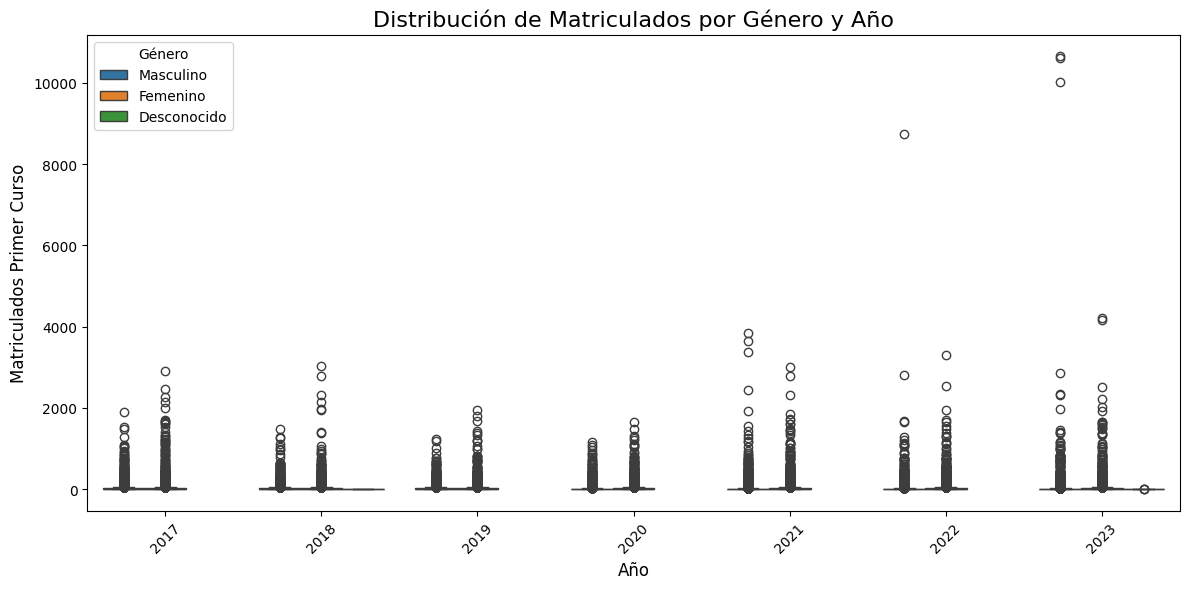

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='AÑO', y='PRIMER_CURSO', hue='SEXO')

# Configurar etiquetas y título
plt.title('Distribución de Matriculados por Género y Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Matriculados Primer Curso', fontsize=12)
plt.legend(title='Género')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()